In [ ]:
!pip install --upgrade pip
!pip install iqm-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
INFO: pip is looking at multiple versions of opentelemetry-proto to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of opentelemetry-proto to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of iqm-exa-common to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of iqm-exa-common to 

In [ ]:
!pip install "qrisp[iqm]"

INFO: pip is looking at multiple versions of numpy-typing-compat to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.6/806.6 kB 27.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 91.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 56.9 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 77.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 64.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 125.6 MB/s  0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.14.0
    Uninstalling sympy-1.14.0:
      Successfully uninstalled sympy-1.14.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstallin

In [ ]:
!pip install qiskit qiskit-aer qiskit-ibm-runtime pylatexenc

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.8 MB/s  0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136898 sha256=d76a1b74c94d4f922f68a64ec5c58f5d618d6bfbc7124ce813de36cad95e072f
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [qiskit-ibm-runtime]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
iqm-station-control-client 12.0.3 requires requests==2.32.3, but you have requests 2.32.5

In [ ]:
from iqm.qiskit_iqm import IQMProvider
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector

# Approaching Quantum Entanglement in a Statistical Approach


Quantum State Construction: Consider $n$ qubits such that for all $0 \leq i \leq n-2$, there exists a Hadamard control Gate between qubit $i$ and qubit $i+1$. For the first qubit (qubit $0$), there is a normal Hadamard gate applied to it as well. Suppose $n = 5$.

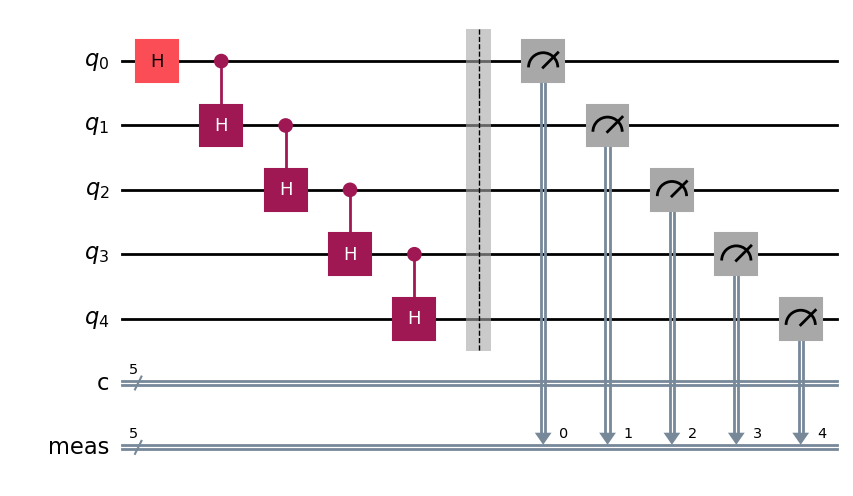

In [ ]:
qc = QuantumCircuit(5, 5)

qc.h(0)

qc.ch(0, 1)
qc.ch(1, 2)
qc.ch(2, 3)
qc.ch(3, 4)
qc.measure_all()
qc.draw("mpl")


In [ ]:
provider = IQMProvider("https://resonance.meetiqm.com",
                       quantum_computer="emerald",
                       token="API KEY")
backend = provider.get_backend()
qc_transpiled = transpile(qc,backend)
job = backend.run(qc_transpiled)

results=job.result().get_counts()
print(results)

Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

{'00000': 426, '00001': 239, '00011': 144, '10001': 9, '00110': 10, '11111': 20, '00010': 20, '01111': 28, '00111': 61, '01100': 3, '01011': 4, '10000': 10, '01000': 9, '10100': 1, '00101': 7, '11100': 5, '01101': 3, '11110': 3, '01001': 4, '10011': 4, '11011': 3, '11000': 2, '10111': 2, '00100': 2, '11101': 1, '11001': 3, '10010': 1}


In [ ]:
plot_histogram(results)

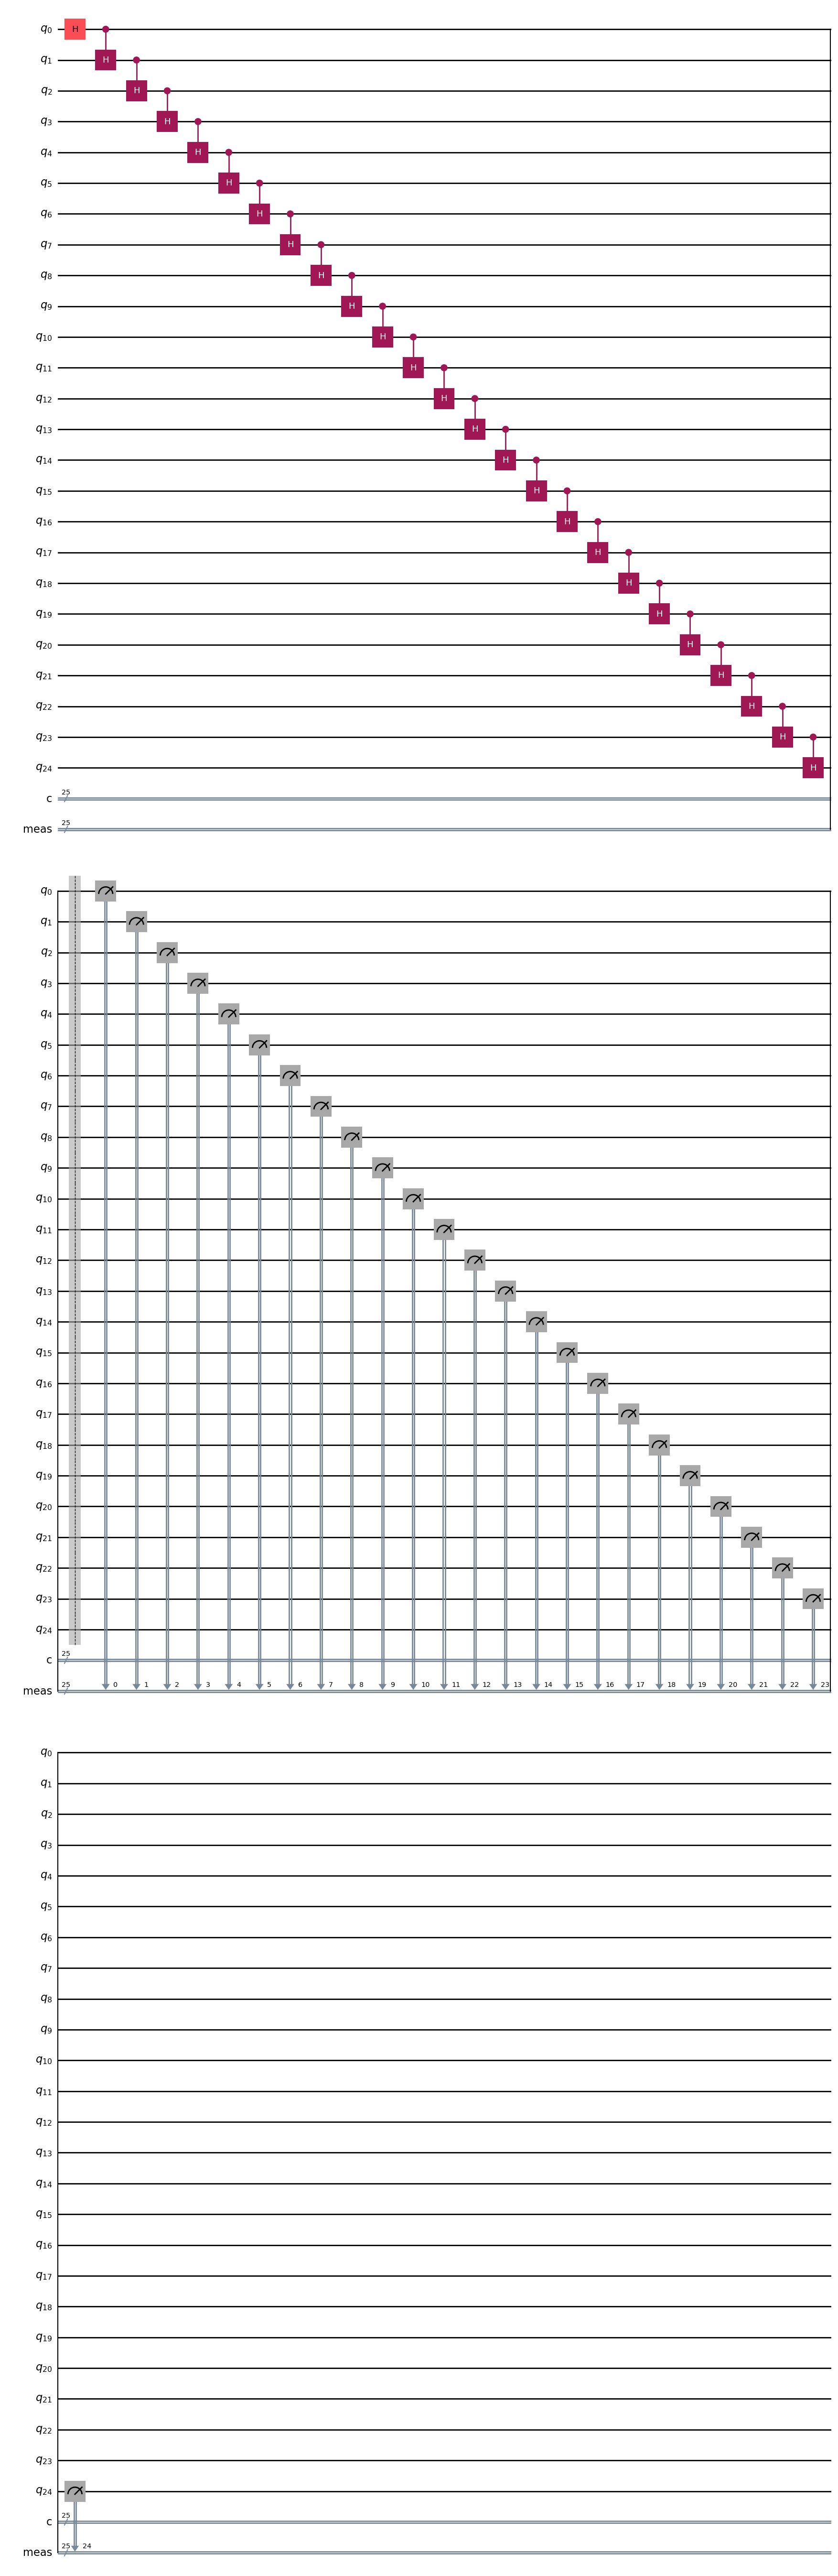

In [ ]:
qc = QuantumCircuit(25, 25)

qc.h(0)
for i in range(24):
  qc.ch(i, i+1)
qc.measure_all()
qc.draw("mpl")


After the first Hadamard gate, $q_0$ has equal probability of either $|0\rangle$ or $|1\rangle$ states, so the controlled Hadamard gate on $q_1$ is equally like to be activated or not, leaving a $\frac{1}{2}$ chance of $|1\rangle$ state if $q_0$ is $|1\rangle$.
Thus, $|q_0q_1\rangle$ $=$ $\frac{(\sqrt2|00⟩ + 0\cdot |01⟩ + 1·|10⟩ + 1·|11⟩}{2}$.
Note that any qubit $q_n$ can only take the $|1\rangle$ state if $q_{n-1}$ is also $|1\rangle$. By induction, this means the qubits $q_0, q_1, ... q_{n-1}$ must all have taken the $|1\rangle$ state.
<br> <br>
It follows that for an $n$ qubit system, the probability of measuring the $i$-th qubit to be $|1\rangle$ is $\frac{1}{2^{i+1}}$.

Progress in queue:   0%|          | 0/1 [00:00<?, ?it/s]

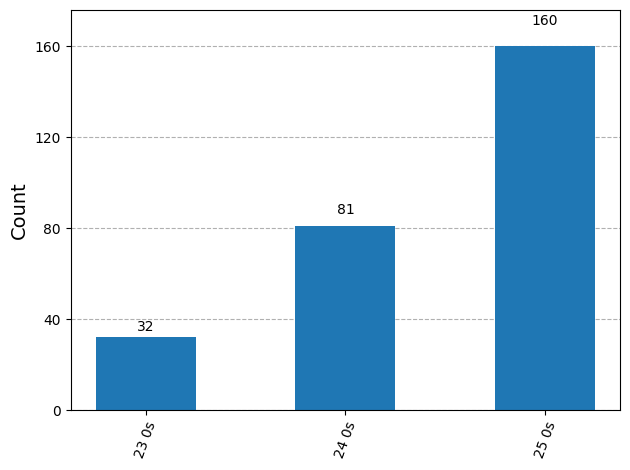

In [ ]:
provider = IQMProvider("https://resonance.meetiqm.com",
                       quantum_computer="emerald",
                       token="API KEY")
backend = provider.get_backend()

qc_transpiled = transpile(qc,backend)
job = backend.run(qc_transpiled)

counts=job.result().get_counts()
hist_data = {}
hist_data["25 0s"] = counts["0000000000000000000000000"]
hist_data["24 0s"] = counts["0000000000000000000000001"]
hist_data["23 0s"] = counts["0000000000000000000000011"]
plot_histogram(hist_data)


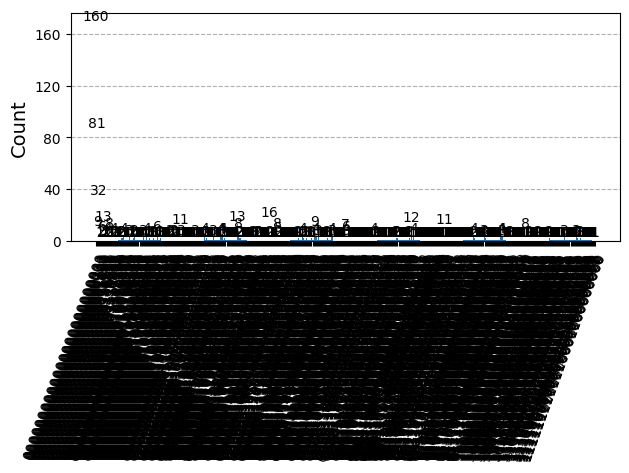

In [ ]:
plot_histogram(counts)

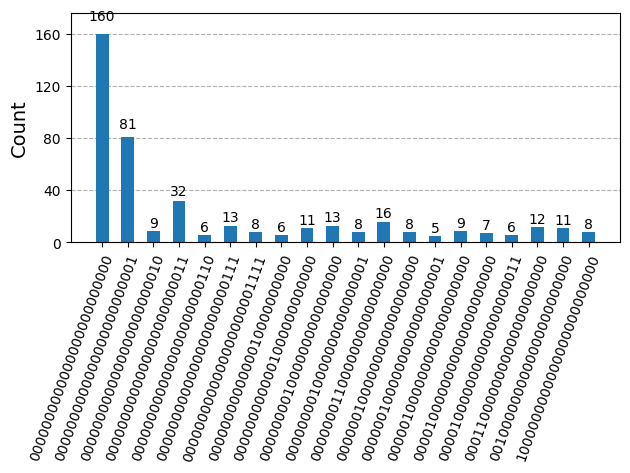

In [ ]:
sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)

# 2. Take top 20
top20 = dict(sorted_items[:20])

# 3. Plot only the top 20
plot_histogram(top20)

In [ ]:
sorted_items

[('0000000000000000000000000', 160),
 ('0000000000000000000000001', 81),
 ('0000000000000000000000011', 32),
 ('0000000110000000000000000', 16),
 ('0000000000000000000000111', 13),
 ('0000000010000000000000000', 13),
 ('0001100000000000000000000', 12),
 ('0010000000000000000000000', 11),
 ('0000000000001000000000000', 11),
 ('0000000000000000000000010', 9),
 ('0000010000000000000000000', 9),
 ('1000000000000000000000000', 8),
 ('0000000010000000000000001', 8),
 ('0000000000000000000001111', 8),
 ('0000001000000000000000000', 8),
 ('0000100000000000000000000', 7),
 ('0000000000000010000000000', 6),
 ('0000000000000000000000110', 6),
 ('0000100000000000000000011', 6),
 ('0000001000000000000000001', 5),
 ('0000001110000000000000000', 4),
 ('0000000001000000000000001', 4),
 ('0000000001000000000000011', 4),
 ('0110000000000000000000000', 4),
 ('0000000000100000000000000', 4),
 ('0001100000000000000000011', 4),
 ('0110000000000000000000001', 4),
 ('0000000000000000001000000', 4),
 ('0000110

In [ ]:
total = sum(counts.values())
total

1024